# Telcom Customer Churn data visualization and classification

The data is to analyze, predict customer behavior to retain customers by analyzing all relevant customer data and develop focused customer retention programs.

# Attribute Information:

1. customerID:- Customer ID
2. gender:- Whether the customer is a male or a female
3. SeniorCitizen:- Whether the customer is a senior citizen or not (1, 0)
4. Partner:- Whether the customer has a partner or not (Yes, No)
5. Dependents:- Whether the customer has dependents or not (Yes, No)
6. tenure:- Number of months the customer has stayed with the company
7. PhoneService:- Whether the customer has a phone service or not (Yes, No)
8. MultipleLines:- Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService:- Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity:- Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup:- Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection:- Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport:- Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV:- Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies:- Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract:- The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling:- Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod:- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges:- The amount charged to the customer monthly
20. TotalCharges:- The total amount charged to the customer
21. Churn:- Whether the customer churned or not (Yes or No)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
from sklearn import preprocessing

In [27]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [29]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [30]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# Replacing 'No phone service' or 'No internet service' with 'No'

From obserervation, having 'No phone service' or 'No internet service' is equivalent to 'No', so in all the columns in the list Noservice corresponding replacement is done.

In [32]:
Noservice = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [33]:
for x in Noservice:
    data[x]=data[x].apply(lambda x: 'Yes'if x=='Yes' else 'No')

In [34]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

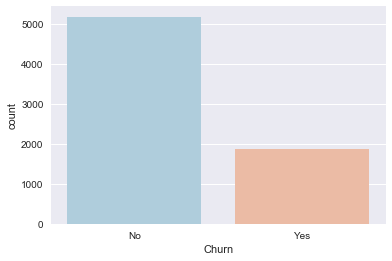

In [35]:
sns.countplot(x='Churn',data=data,palette='RdBu_r')

# Dropping unnecessary column

The 'customerID' is random and has no significance in determining any kind of relationship to churn and hence dropped. Here categorical columns are listed out from continuous columns for creating visualizations.

In [36]:
data.drop('customerID',axis=1,inplace=True)
l2=['tenure','MonthlyCharges', 'TotalCharges', 'Churn' ]
l1=list(data.columns)
category_cols=list(filter(lambda x: x not in l2, l1))
print(type(category_cols[0]))

<class 'str'>


# Count plot of categorical columns with churn

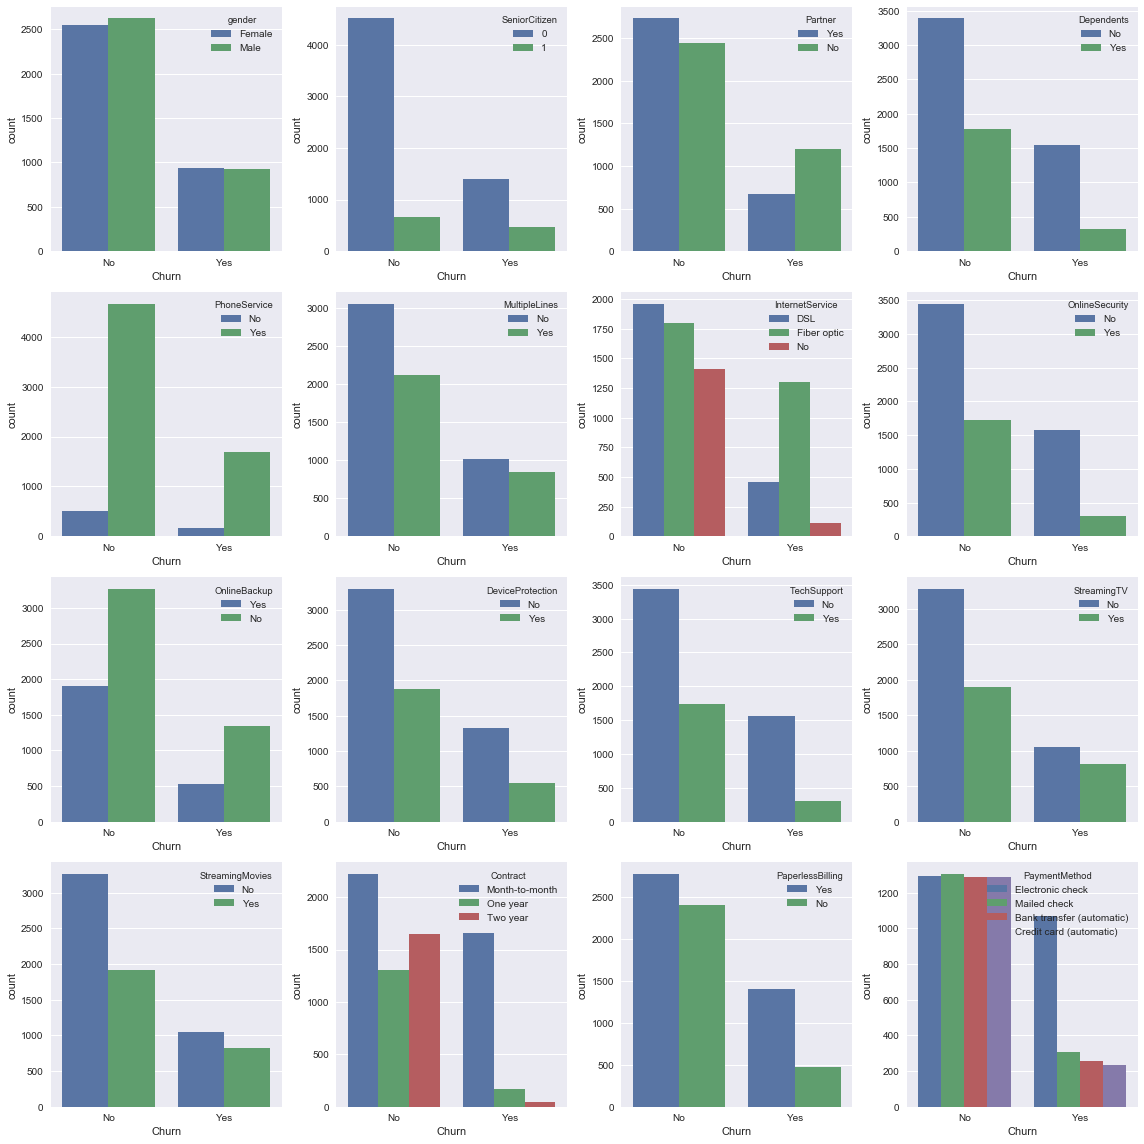

In [37]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

iter=0
for x_iter in [0,1,2,3]:
    for y_iter in [0,1,2,3]:
        abc= category_cols[iter]
        sns.countplot( x= "Churn", data=data,  hue=abc, orient='v' , ax=axes[x_iter,y_iter])
        iter=iter+1
fig.tight_layout()

In [38]:
print(data['TotalCharges'].dtype)

object


# Data wrangling/munging

TotalCharges should be numerical but is recoginzed as object by pandas hence it contains some junk values string, 
hence non-numeric junk values are replace by null value and cleaned

In [39]:
#Replace non numeric values with null values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

'TotalCharges' column contains null values, hence the rows are dropped from the dataframe

In [43]:
idx =data['TotalCharges'].isnull()
data=data[~idx]

In [45]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# kde plot of continuous columns with churn

In [46]:
def conti_Plot(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Pdf for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes')

C:\Users\Ramesh\Anaconda3_1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


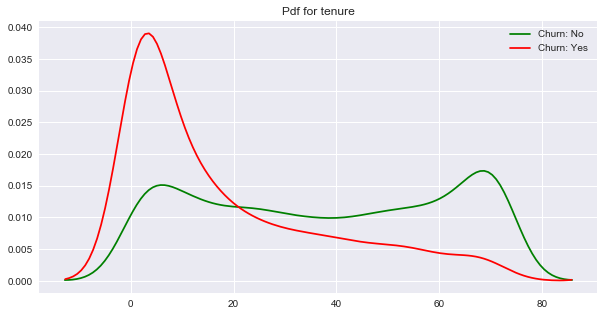

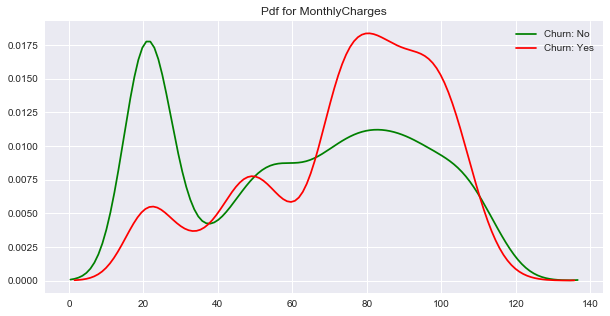

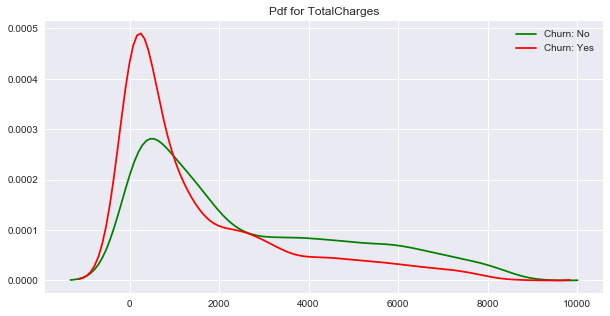

In [47]:
conti_Plot('tenure')
conti_Plot('MonthlyCharges')
conti_Plot('TotalCharges')

Tenure and MonthlyCharges are probably important features

# Label encoding categorical columns values 

In [48]:
le = preprocessing.LabelEncoder()
for m in category_cols:
    data[m]=le.fit_transform(data[m])

In [49]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [50]:
#le = preprocessing.LabelEncoder()
#data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
#data['MultipleLines'] = pd.get_dummies(data['MultipleLines'])

# Correlation matrix of all the valables

In [51]:
correlation=data.corr()
correlation.style.background_gradient()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1,-0.00181939,-0.00137905,0.0103489,0.00528537,-0.00751498,-0.00888274,-0.00223586,-0.0163278,-0.0130928,-0.000806746,-0.00850716,-0.0071244,-0.0101054,9.46992e-05,-0.0119019,0.0169424,-0.0137793,4.78395e-05
SeniorCitizen,-0.00181939,1,0.0169566,-0.21055,0.0156835,0.00839161,0.142996,-0.0321597,-0.0385764,0.0666628,0.0595139,-0.0605768,0.105445,0.119842,-0.14182,0.156258,-0.0381578,0.219874,0.102411
Partner,-0.00137905,0.0169566,1,0.452269,0.381912,0.0183972,0.142561,0.00051251,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.0139567,-0.156232,0.097825,0.319072
Dependents,0.0103489,-0.21055,0.452269,1,0.163386,-0.00107781,-0.0243067,0.0440299,0.0807855,0.0236388,0.0138997,0.0630532,-0.0164987,-0.0383749,0.240556,-0.110131,-0.0419891,-0.112343,0.0646532
tenure,0.00528537,0.0156835,0.381912,0.163386,1,0.00787733,0.332399,-0.0298348,0.328297,0.361138,0.36152,0.325288,0.280264,0.285402,0.676734,0.00482316,-0.370087,0.246862,0.82588
PhoneService,-0.00751498,0.00839161,0.0183972,-0.00107781,0.00787733,1,0.27953,0.387266,-0.0916757,-0.0521334,-0.0700756,-0.0951385,-0.0213827,-0.0334775,0.00301869,0.0166961,-0.00549894,0.248033,0.113008
MultipleLines,-0.00888274,0.142996,0.142561,-0.0243067,0.332399,0.27953,1,0.0113456,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.17124,0.490912,0.469042
InternetService,-0.00223586,-0.0321597,0.00051251,0.0440299,-0.0298348,0.387266,0.0113456,1,-0.392174,-0.313708,-0.305757,-0.388535,-0.24133,-0.250144,0.0995792,-0.138166,0.0845043,-0.322173,-0.175691
OnlineSecurity,-0.0163278,-0.0385764,0.143346,0.0807855,0.328297,-0.0916757,0.098592,-0.392174,1,0.283285,0.274875,0.354458,0.175514,0.187426,0.24566,-0.00405125,-0.149112,0.296447,0.412619
OnlineBackup,-0.0130928,0.0666628,0.141849,0.0236388,0.361138,-0.0521334,0.202228,-0.313708,0.283285,1,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.17072,0.441529,0.5101


In [52]:
"""
Heat map of correlation matrix

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))
"""

'\nHeat map of correlation matrix\n\nplt.figure(figsize=(12, 12))\nsns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, \n                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))\n'

# Train & test data splitting

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.30, 
                                                    random_state=101)

# LogisticRegression classifier

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
log_predictions = logmodel.predict(X_test)

In [58]:
print(confusion_matrix(y_test,log_predictions))

[[1396  184]
 [ 240  290]]


In [59]:
print(classification_report(y_test,log_predictions))

             precision    recall  f1-score   support

         No       0.85      0.88      0.87      1580
        Yes       0.61      0.55      0.58       530

avg / total       0.79      0.80      0.80      2110



In [60]:
accuracy=accuracy_score(y_test,log_predictions)
print(accuracy)

0.7990521327014218


# support vector machine classifier

In [61]:
from sklearn.svm import SVC

In [62]:
model = SVC()

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C': [0.1,0.5, 1 ,5 , 10], 'gamma': [0.01,0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']}

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.744823, total=   2.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.749390, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


[CV] .... C=0.1, gamma=0.01, kernel=rbf, score=0.754268, total=   2.1s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.005, kernel=rbf, score=0.748477, total=   1.8s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.005, kernel=rbf, score=0.749390, total=   1.8s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.005, kernel=rbf, score=0.754878, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.001, kernel=rbf, score=0.759440, total=   1.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.001, kernel=rbf, score=0.758537, total=   1.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ... C=0.1, gamma=0.001, kernel=rbf, score=0.761585, total=   1.3s
[CV] C=0.1, gamma=0.0005, kernel=rbf .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.741169, total=   2.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.733537, total=   2.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.747561, total=   2.3s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV] .... C=10, gamma=0.005, kernel=rbf, score=0.733252, total=   2.4s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV] .... C=10, gamma=0.005, kernel=rbf, score=0.729268, total=   2.3s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV] .... C=10, gamma=0.005, kernel=rbf, score=0.734756, total=   2.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .... C=10, gamma=0.001, kernel=rbf, score=0.753959, total=   1.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.1min finished


{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [66]:
grid_predictions = grid.predict(X_test)

In [67]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1453  127]
 [ 311  219]]
             precision    recall  f1-score   support

         No       0.82      0.92      0.87      1580
        Yes       0.63      0.41      0.50       530

avg / total       0.78      0.79      0.78      2110



In [68]:
accuracy=accuracy_score(y_test,grid_predictions)
print(accuracy)

0.7924170616113744


# Decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [70]:
predictions_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions_tree))

[[1264  316]
 [ 268  262]]


In [71]:
accuracy=accuracy_score(y_test,predictions_tree)
accuracy

0.7232227488151659

# Random forest model

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc_model=rfc.fit(X_train, y_train)

C:\Users\Ramesh\Anaconda3_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [73]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[1403  177]
 [ 262  268]]


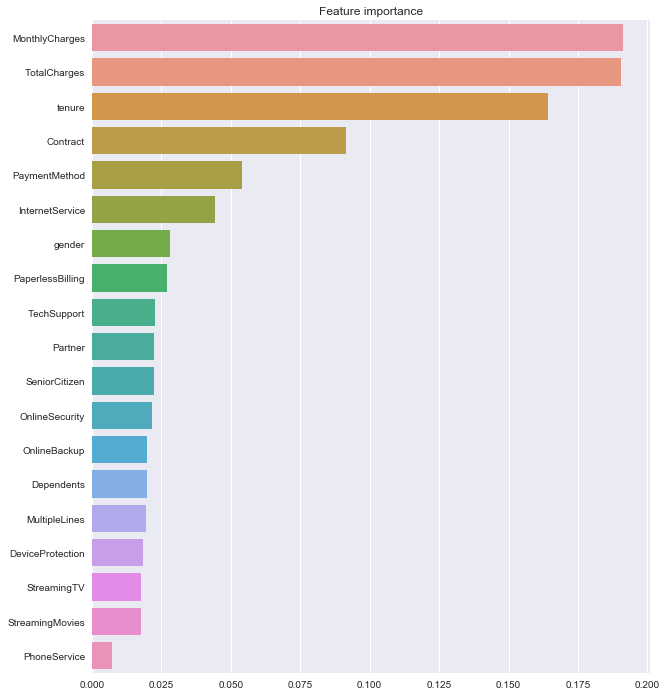

In [75]:
imp = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

In [76]:
accuracy=accuracy_score(y_test,rfc_pred)
accuracy

0.7919431279620853

In [77]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1403  177]
 [ 262  268]]
             precision    recall  f1-score   support

         No       0.84      0.89      0.86      1580
        Yes       0.60      0.51      0.55       530

avg / total       0.78      0.79      0.79      2110

